In [ ]:
## importamos algumas bibliotecas que serão usadas
import numpy as np  # Para um mínimo de matemática
import matplotlib.pyplot as plt # Para gráficos
from matplotlib.gridspec import GridSpec
import sys
import math


# MAP0214 - EP1: Zeros de funções e Sistemas Lineares


**Nome:**

**Número USP:**

**Turma:**

<p align = "justify">O objetivo deste Exercício-Programa (EP) é o de implementar métodos de resolução numérica para encontrar pontos de mínimo, máximo ou sela (pontos extremais), de uma função de várias variáveis:
\begin{equation}
  V = V(x_1,\cdots,x_n), (x_1,\cdots,x_n) \in \mathbb{R}^n
  \tag{1}
\end{equation}
Este é um problema bastante comum na área de otimização, e possui diversas aplicações em, por exemplo, engenharia, finanças, etc. Na física, problemas de otimização também são extremamente comuns, dado que as leis da física podem ser, em geral, escritas como as condições em que algum funcional escalar seja minimizado. Vamos abordar este aspecto no presente exercício.

A minimização de um funcional $V=V(x_1,\cdots,x_n)$ pode parecer desconexo com o que foi visto em sala (o de se encontrar zeros de funções). Porém, a partir deste problema de otimização, podemos estabelecer um sistema de equações (não-lineares) em que todas devem ser anuladas. Para ver isto, podemos nos lembrar que, para que o funcional $V$ seja extremal, devemos ter, necessariamente que o seu gradiente:
\begin{equation}
    f_i(x_1,\cdots,x_n) = \frac{\partial V}{\partial x_i} (x_1,\cdots,x_n)
    \tag{2}
\end{equation}
se anule. Logo, podemos reescrever o problema de otimização como o de se encontrar um ponto $(x_1^*,\cdots,x_n^*)$ tal que as funções $f_i$ se anulam:
\begin{equation}
    f_i(x_1^*,\cdots,x_n^*) = \frac{\partial V}{\partial x_i} (x_1^*,\cdots,x_n^*) = 0
    \tag{3}
\end{equation}
Isto é uma generalização do problema visto em sala de aula, em que encontrávamos o zero de apenas uma função, de apenas uma variável, $f(x)=0$.

Notamos que, para a realização desta tarefa, também serão cobrados algoritmos de resolução de sistemas lineares, que é o assunto do segundo bloco de aulas do curso.


**Orientações:**
- Salve uma cópia deste notebook para editá-lo.
- Utilize o índice à esquerda para identificar as questões que precisam ser respondidas.
- As respostas das questões deverão ser respondidas nos espaços indicados abaixo.
- Envie o link do seu notebook na página de entrega da atividade no Moodle da disciplina.

<font color='red'>
IMPORTANTE: os problemas descritos neste EP depende de parâmetros escolhidos em função de seu número USP.

Complete e rode a célula abaixo para obter esses parâmetros.
</font>



In [ ]:
# NUSP, escrito como uma lista
# exemplo, NUSP = 12345678
NUSP = [1,2,3,4,5,6,7,8]

#Parte 1 - Formulação do problema


## Otimização Não-Linear: Método de Newton

Vamos considerar primeiramente o problema genérico da minimização de uma função $V=V(x_1,\cdots,x_n)$. Vimos que toda solução deste problema anula o gradiente da função, e portanto vamos reescrevê-lo como o de se encontrar zero do conjunto de funcoes $f_i(x_1^*,\cdots,x_n^*)$ apresentado nas equações (3).

Para isto, vamos utilizar um método iterativo de ponto-fixo. Isto é, vamos construir uma sequência (na variável vetorial $\mathbf{x}=(x_1,\cdots,x_n)$), $\{\mathbf{x}_k\}_{k=0}^{\infty}$ tal que:
\begin{equation}
  \mathbf{x}_k = \phi(\mathbf{x}_{k-1})
\end{equation}
para alguma escolha de $\mathbf{x}_0$.

Várias possibilidades existem para a escolha da função:
\begin{equation}
  \phi: \mathbb{R}^n \rightarrow \mathbb{R}^n
\end{equation}
Podemos ver que o problema da determinação de $\phi$ tal que a sequência converge é, neste caso multi-dimensional, consideravelmente mais difícil do que anteriormente. Podemos citar, num primeiro momento, métodos de descida/subida de gradiente, em que, para um ponto $\mathbf{x}_{k-1}$, vamos calcular o gradiente:
\begin{equation}
  \nabla_{\mathbf{x}} V(\mathbf{x}_{k-1}) = (f_1(\mathbf{x}_{k-1}),\cdots,f_n(\mathbf{x}_{k-1}))
\end{equation}
e tomar o próximo ponto da sequência como sendo o ponto anterior $\mathbf{x}_{k-1}$ mais uma contribuição na direção do gradiente, dado que este é o vetor que "mais altera" a função $V$. A descida/subida do gradiente se escreve, portanto, como:
\begin{equation}
  \mathbf{x}_k = \mathbf{x}_{k-1} + \alpha_{k-1} \nabla_{\mathbf{x}} V(\mathbf{x}_{k-1}) = \phi(\mathbf{x}_{k-1})
\end{equation}
onde, em geral, o parâmetro $\alpha_{k-1}$ é estimado, a cada iteração, de modo a garantir a convergência da sequência para (um) ponto extremal $\mathbf{x}^*=(x_1^*,\cdots,x_n^*)$.

A determinação deste parâmetro, a cada iteração, envolve muita tecnologia, e é assunto de cursos mais avançados de otimização não-linear. Por esta razão, nneste exercício não vamos abordar este aspecto. Ao invés disso, vamos extender o método de Newton, utilizando a sua interpretação geométrica. Para problemas uni-dimensionais (ou seja, encontrar o zero de $f(x)$), aproximamos a função $f(x)$ em torno de $x_{k-1}$ por uma reta $(y-f(x_{k-1}))=f'(x_{k-1})(x-x_{k-1})$ e definimos $x_k$ como sendo o ponto em que esta reta se anula. Em casos multi-dimensionais, vamos tomar um raciocínio análogo para cada função $f_i(\mathbf{x})$, ou seja, vamos impor que cada hiper-plano:
\begin{equation}
  (y_i-f_i(\mathbf{x}_{k-1})) = \nabla^T_\mathbf{x} f_i (\mathbf{x}_{k-1}) \cdot (\mathbf{x} - \mathbf{x}_{k-1}), i=1,\cdots,n
\end{equation}
se anule, ou seja, $y_i=0$. Se definirmos a matriz Jacobiana:
\begin{equation}
  J_{k-1} = (\nabla_\mathbf{x} f_1 (\mathbf{x}_{k-1}),\cdots , \nabla_\mathbf{x} f_n (\mathbf{x}_{k-1}) )^T
\end{equation}
Vemos que o ponto $\mathbf{x}_{k}$ é dado, matricialmente, por:
\begin{equation}
  \mathbf{x}_{k} = \mathbf{x}_{k-1} - J_k^{-1} f(\mathbf{x}_{k-1})
  \tag{4}
\end{equation}

Repare que este método de Newton generalizado pode ser definido e utilizado para encontrarmos o zero de qualquer função vetorial, independentemente da existência de um problema de otimização associado. Se este for o caso, podemos reescrever a equação 4 como:
\begin{equation}
  \mathbf{x}_{k} = \mathbf{x}_{k-1} - H_{k-1}^{-1} \nabla_\mathbf{x} V(\mathbf{x}_{k-1})
  \tag{5}
\end{equation}
onde $H_{k-1} = \nabla_\mathbf{x} \nabla_\mathbf{x} V(\mathbf{x}_{k-1})$ é a cahamada matriz Hessiana de $V$.

Aqui, devemos também perceber que a determinação de $\mathbf{x}_k$ em função de $\mathbf{x}_{k-1}$ passa pela resolução de um sistema linear, dado por:

\begin{equation}
  H_{k-1} \delta \mathbf{x}_k = \nabla_\mathbf{x} V(\mathbf{x}_{k-1})
  \tag{6}
\end{equation}

Por isto, neste exercício, não são apenas cobrados conceitos de zero de funções, mas também de resolução de sistemas lineares, por eliminação de Gauss.

Finalmente, a iteração se escreve como:
\begin{equation}
  \mathbf{x}_{k} = \mathbf{x}_{k-1} - \delta \mathbf{x}_k
  \tag{7}
\end{equation}



## Equilíbrio de sistemas

Vamos considerar o problema de se encontrar estados de equilíbrio de um sistema de partículas. Mais especificamente, vamos considerar $n$ cargas elétricas livres para se mover, sem atrito, dentro de um tubo. Este tubo tem comprimento $L$, de maneira que uma de suas extremidades pode ser posicionada em $x=0$ e a outra em $x=L$. A posição de cada uma das cargas no interior do tubo é dada por $\{x_i\}_{i=1}^n$, e cada uma destas partículas têm carga $\{q_i\}_{i=1}^n$. Na extremidades do tubo são também posicionadas (e fixadas) duas cargas, com:
$$ x_0 = 0, q_0, \;\;\; e \;\;\; x_{n+1} = L, q_{n+1} $$

A energia potencial eletrostática entre duas partículas é dada por:

\begin{equation}
  U_{i,j} = U_{i,j} (x_j - x_i) = - k \frac{q_i q_j}{x_j - x_i}
  \tag{8}
\end{equation}

A energia potencial total do sistema pode ser entendida como a soma de todas as interações dois-a-dois (não repetidas) entre todas as partículas. Porém, para a simplificação do problema, vamos considerar que interações entre partículas "não-vizinhas" são desprezíveis, fazendo com que a enegia total seja apenas:

\begin{equation}
  V = V(x_1,\cdots,x_n) = U_{0,1}(x_1-x_0) + U_{1,2}(x_2-x_1) + \cdots + U_{n-1,n}(x_n-x_{n-1}) + U_{n,n+1}(x_{n+1}-x_n)
  \tag{9}
\end{equation}

Desejamos encontrar a posição das cargas do interior $(x_1,\cdots,x_n)$ tal que $V = V(x_1,\cdots,x_n)$ seja extremal. Repare que devemos considerar a influência das cargas das extremidades do tubo para que as cargas em seu interior "não escapem".

# Parte 2 - Resolução numérica

Nesta parte do enunciado, vamos implementar as funções responsáveis pela resolução dos sistemas lineares com que vamos trabalhar, bem como as funções responsáveis pela implementação do método de Newton.

## Questão 2.1. Funções para resolução de sistemas lineares

## 1.2. - Resolução por eliminação de Gauss

Seja $A \in R^{n \times n}$ e $\mathbf{b} \in R^{n,k}$. Tal sistema pode ser escrito na forma $M=[A,\mathbf{b}] \in R^{n,m}$ (onde $m=n+k$) e resolvido pelo método da eliminação de Gauss. Este método se propõe a triangularizar a matriz $M$ através de operações elementares de suas linhas. Supondo que esta matriz já possui entradas nulas nas $(p-1)$ colunas inferiores, nos resta, na etapa $p$, anular sua $(p)$ coluna inferior, fazendo:

1. Vamos verificar que $|a_{p,p}|\neq0$. Se for o caso, vamos trocar a linha $p$ pela próxima linha $q$, tal que $|a_{q,p}|\neq0$. Questão: o que acontece se esta linha não existir? O que podemos dizer sobre a matriz?
2. Supondo $a_{p,p}\neq0$, calcule os multiplicadores $m_{i,p} = a_{i,p} / a_{p,p}$.
3. Realize as operações elementares nas linhas: $L_{i} \leftarrow L_i - m_{i,p} L_{p}$. Os termos $a_{i,p}$ da nova linha $L_i$ deverão ser zero.
4. Nestes elementos, vamos armazenar $m_{i,p}$
5. Volte ao passo 1.


### Questão 2.1.a
Dada uma matriz $M \in R^{n,m}$ e dois números inteiros $p,q$, implemente uma função que permute as linhas $L_p$ com $L_q$

**Resposta:**


In [ ]:
def permutacao_matrix(M, p, q):
  """
  Permuta as linhas "p" e "q" da matriz "M"

  Entradas:
  - M: Matrix R^{m,n}
  - p,q: indices das linhas a serem permutadas

  Saídas:
  - M_perm: matriz cujas linhas foram permutadas
  """

  Lp = ##
  Lq = ##
  M_perm = np.copy(M)

  return M_perm

### Questão 2.1.b
Dada uma matriz $M \in R^{n,m}$, dois números inteiros $i,p$, e um número $m$, implemente uma função que realize $L_i \leftarrow L_i - m L_p$.

**Resposta:**

In [ ]:
def op_elem_matrix(M, i, p, m):
  """
  Realiza a operação elementar L_i <- L_i - m * L_p

  Entradas:
  - M: Matrix R^{m,n}
  - p: indice da linha usada para anular a linha "L_i" (base)
  - i: Indice da linha ("L_i") cujo  a serem permutadas (alvo)

  Saídas:
  - M_modif: matriz modificada
  """

  Lp = ##
  Li = ##
  M_modif[i,:] = ##

  return M_modif

### Questão 2.1.c.
Escreva uma função que realiza a eliminação Gaussiana, conforme o algoritmo apresentado acima.

**Resposta:**

In [ ]:
def el_Gaussiana(M,verbosity):
  """
  Realiza a eliminação Gaussiana na matriz M "m x n"
  Vamos armazenar tambem os multiplicadores

  Entradas:
  - M: Matrix R^{m,n}
  - verbosity: parametro de verbosidade (meramente cosmético):
      se for = 1: exibe as operações efetuadas no processo (facilita na correção)
      se for = 0: não exibe nada

  Saídas:
  - M_modif: matriz triangular (triangulo inferior com multiplicadores)
  """

  (n,m) = M.shape

  # tolerancia para tomarmos um valor como "zero"
  tol = 1.e-8

  for p in range(0,n):

      if verbosity==1:
        print(" ")
        print("-----------------------------------------------")
        print("-----------------------------------------------")
        print("Na etapa "+str(p)+" , a matriz M é : ")
        print(str(M))

    # Verificmos se o pivo e nulo. Se sim, realizamos permutacao de linhas
    if abs(M[p,p]) < tol:
      # Vamos trocar a linha com a próxima, tal que seu pivô seja não-nulo


    for q in range(p+1,n):
      m = ## multiplicador
      M_new = ##
      M = np.copy(M_new)

    if verbosity==1:
      print(" ")
      print("Na etapa "+str(p)+" , a eliminacao de Gauss resulta em:")
      print(str(M))

  return M

### Questão 2.1.d
Escreva uma função que resolve um sistema na forma

$$
U x = d
$$

onde $U$ é uma matriz triangular superior.
Utilize esta função para encontrar a solução do sistema correspondente ao circuito elétrico apresentado.

Vamos testar as funções e metodos implementados na matriz (já apresentada em sala de aula):

$$
M = \begin{pmatrix}
1 & 4 & 52 & 57 \\
27 & 110 & -3 & 134 \\
22 & 2 & 14 & 38 \\
\end{pmatrix}
$$


In [ ]:
def res_triangular_superior(U,d):
  """
  Resolve o sistema, suposto triangular superior, U x = d

  Entradas:
  - U: Matriz R^{n,n}
  - d: Matriz R^{n,k}

  Saídas:
  - x: Matriz de solucao, R^{n,k} (um poara cada coluna em "d")
  """

  x   = np.copy(d)
  rhs = np.copy(x)

  (n,k) = d.shape

  for l in range(0,k):
      for i in range(n-1,-1,-1):
          # vamos calcular o termo forcante (rhs, "right-hand-side")
          rhs[i,l] = ##

          # em seguida, vamos calcular a solução
          x[i,l] = ##

  print("A matriz-solucao e: ")
  print(str(x))

  print("Seu residuo (para o sistema Ux=d) é:")
  res = np.copy(x)
  res = ##
  print(str(res))

  return x

## Teste numérico --------------------------------------
## Resolucao do sistema
M = [[1 ,4. ,57,57 ],
     [27,110,-3,134],
     [22,2. ,14,39 ]];

print(" ")
print(" ")
print(" ")
print(" Eliminacao de Gauss")
print("-----------------------------------------------")
print("-----------------------------------------------")
Ud = el_Gaussiana(M,1)

print(" Resolucao")
print("-----------------------------------------------")
print("-----------------------------------------------")
U = Ud[0:n,0:n]
d = Ud[0:n,n:m]
x = res_triangular_superior(U,d)

print("Seu residuo (para o sistema Ax=b) é:")
res = np.matmul(A,np.array(x)) - b.reshape(n,1)
print(str(res))

## Questão 2.2. Resolução por eliminação de Gauss com condensação pivotal (parcial)

Seja $A \in R^{n \times n}$, $\mathbf{b} \in R^{n,k}$ e $M=[A,\mathbf{b}] \in R^{n,m}$, tais como anteriormente. A eliminação Gaussiana, com condensação pivotal, resulta em um metodo bastante similar ao anterior, onde dada uma matriz cujas $(p-1)$ colunas inferiores já foram anuladas, fazemos:

1. (Condensação Pivotal) Vamos identificar nas linhas $q>p$ o maior elemento, em módulo, $|a_{q,p}| \geq |a_{p,p}|, \forall q\geq p$. Em seguida, vamos trocar as linhas $L_q$ e $L_p$. Vamos também armazenar as trocas de linhas num vetor de permutação.
2. Supondo $a_{p,p}\neq0$, calcule os multiplicadores $m_{i,p} = a_{i,p} / a_{p,p}$.

Pergunta: Neste caso, o que acontece se $a_{p,p}=0$?

3. Realize as operações elementares nas linhas: $L_{i} \leftarrow m_{i,p} L_{p}$. Os termos $a_{i,p}$ da nova linha $L_i$ deverão ser zero.
4. Nestes elementos, vamos armazenar $m_{i,p}$
5. Volte ao passo 1.

### Questão 2.2
Implemente a eliminação Gaussiana com Condensação Pivotal.

**Resposta:**

In [ ]:
def el_Gaussiana_CP(M,vp,verbosity):
  """
  Realiza a eliminação Gaussiana, com Condensacao Pivotal (parcial),
  na matriz M "m x n"
  Vamos armazenar tambem os multiplicadores

  Entradas:
  - M: Matrix R^{m,n}
  - vp: vetor permutação, a ser modificado internamente
  - verbosity: parametro de verbosidade (meramente cosmético):
      se for = 1: exibe as operações efetuadas no processo (facilita na correção)
      se for = 0: não exibe nada

  Saídas:
  - M_modif: matriz triangular (triangulo inferior com multiplicadores)
  """

  (n,m) = M.shape
  M0 = np.copy(M)

  # tolerancia para tomarmos um valor como "zero"
  tol = 1.e-8

  for p in range(0,n):

    if verbosity==1:
      print(" ")
      print("-----------------------------------------------")
      print("-----------------------------------------------")
      print("Na etapa "+str(p)+" , a matriz M é : ")
      print(str(M))

    # Trocamos as linhas para que o pivo seja o de maior modulo
    appMax = ##
    lMax   = ##

    M_new = ##
    if verbosity==1:
      print(" ")
      print("Na etapa "+str(p)+" , realizamos permutacao das linhas "+str(l)+" e "+str(p)+" :")
    #print(str(M_new))
    M = np.copy(M_new)

    for q in range(p+1,n):
      m = ##
      M_new = ##
      M = np.copy(M_new)

    if verbosity==1:
      print(" ")
      print("Na etapa "+str(p)+" , a eliminacao de Gauss resulta em:")
      print(str(M))

  return M

## Resolucao do sistema
print(" ")
print(" ")
print(" ")
print(" Eliminacao de Gauss (CP)")
print("-----------------------------------------------")
print("-----------------------------------------------")
vp = [i for i in range(0,len(M))]
UdCP = el_Gaussiana_CP(M,1)

print(" Resolucao")
print("-----------------------------------------------")
print("-----------------------------------------------")
UCP = UdCP[0:n,0:n]
dCP = UdCP[0:n,n:m]
xCP = res_triangular_superior(UCP,dCP)

print("Seu residuo (para o sistema Ax=b) é:")
res = np.copy(xCP)
res = np.matmul(A,xCP) - b.reshape(n,1)
print(str(res))

## Questão 2.3. Funções para o método de Newton

Antes de começarmos a implementar as funções para o método de Newton, vamos implementar algumas outras funções intermediárias que organizem e estruturem o código. Escreva três funções que recebem como entrada o valor de duas cargas, $q_i,q_j$, bem como a distância entre elas $x_j-x_i$ e retorne:

1. O valor da energia potencial eletrostática associada
$$ U_{ij}(x_j-x_i) $$
2. A sua derivada
$$ \frac{\partial U_{ij}}{\partial r} (x_j-x_i) $$
3. Sua segunda derivada
$$ \frac{\partial^2 U_{ij}}{\partial r^2} (x_j-x_i) $$

Vamos agora implementar as funções para o metodo de Newton, que recebem um vetor contendo as posições de todas as cargas interiores ao tubo:

$$ \mathbf{x} = (x_1,\cdots,x_n) $$

e retorne:

4. A energia potencial eletrostática total (equação 9)
5. O seu gradiente, $\nabla_{\mathbf{x}} V$
6. A matriz Hessiana, $H = \nabla_{\mathbf{x}} \nabla_{\mathbf{x}} V$

Note que, para todas estas funções, as cargas de cada uma das partículas foi definida como variável global, e não serão passadas como argumento nas funções.

Além disso, elas serão dadas em função do Número USP de cada aluno. Teremos, ao total oito cargas internas, cada uma igual a cada dígito do NUSP acrescida de 50. Assim sendo, um aluno com NUSP 12345678 terá como cargas:

$$ q_1 = 1+50 = 51 $$
$$ q_2 = 2+50 = 52$$
$$ \cdots$$
$$ q_7 = 7+50=57 $$
$$ q_8 = 8+50=58 $$

Além disso, vamos fixar $q_0=50$ e $q_9=50$


In [ ]:
# Cargas internas
q  = [(NUSP[i]+50) for i in range(0,len(NUSP))]
# Cargas internas + extremidades
qq = [50] + q + [50]

# constante para energia potencial eletrostatica (irrelevante)
k  = 1.

# comprimento do tubo
L  = 1.

def fUij(qi,qj,dij):
    return # .... completar

def fdUij(qi,qj,dij):
    return # .... completar

def fd2Uij(qi,qj,dij):
    return # .... completar

def fV(x):
  return # .... completar

def fdV(x):
  return # .... completar

def fd2V(x):
  return # .... completar

## Questão 2.3. Resolução do Problema físico pelo Método de Newton

Vamos agora implementar as iterações sucessivas, correspondendo ao método de Newton.
Para isso, pede-se:

1. Escreva uma "condição inicial" para o método de Newton, $\mathbf{x}_0$, em que as cargas estão equidistantes.
2. Complete o laço das iterações do metodo de Newton, que deve conter:

a) A avaliação da energia potencial eletrostática

b) A avaliação de $\nabla_{\mathbf{x}} V$. Se este vetor for nulo, então as forcas resultantes em cada partícula é nula, e teremos encontrado o ponto de equilíbrio. A partir deste cálculo, vamos, portanto, estabelecer o critério de parada onde, se:
$$|| \nabla_{\mathbf{x}} V || < ɛ $$
o processo iterativo é interrompido. Vamos assumir aqui $ɛ=10^{-8}$

c) A avaliação da matriz Hessiana $\nabla_{\mathbf{x}} \nabla_{\mathbf{x}} V$

c) A inversão do sistema linear dado pela equação (6), e a atualização da aproximação, dada pela equação (7)

 **Resposta:**

V : 236412.0, norma de dV : 40223.33099085646
V : 236046.4555232533, norma de dV : 4489.957715690252
V : 236033.86251924504, norma de dV : 333.12797621900114
V : 236033.79848096723, norma de dV : 45.166851102750066
V : 236033.7969217913, norma de dV : 7.010222967181318
V : 236033.79688281467, norma de dV : 1.123299582964722
V : 236033.79688180742, norma de dV : 0.18053101527011509
V : 236033.7968817814, norma de dV : 0.02903514778646028
V : 236033.79688178073, norma de dV : 0.004670092468084911
V : 236033.79688178073, norma de dV : 0.0007511643114767651
V : 236033.79688178067, norma de dV : 0.00012082180297710812
V : 236033.79688178067, norma de dV : 1.9433697660622803e-05
V : 236033.7968817807, norma de dV : 3.12581824351696e-06
V : 236033.7968817807, norma de dV : 5.027582559884986e-07
V : 236033.79688178073, norma de dV : 8.089354572218544e-08
V : 236033.79688178073, norma de dV : 1.304848419397955e-08


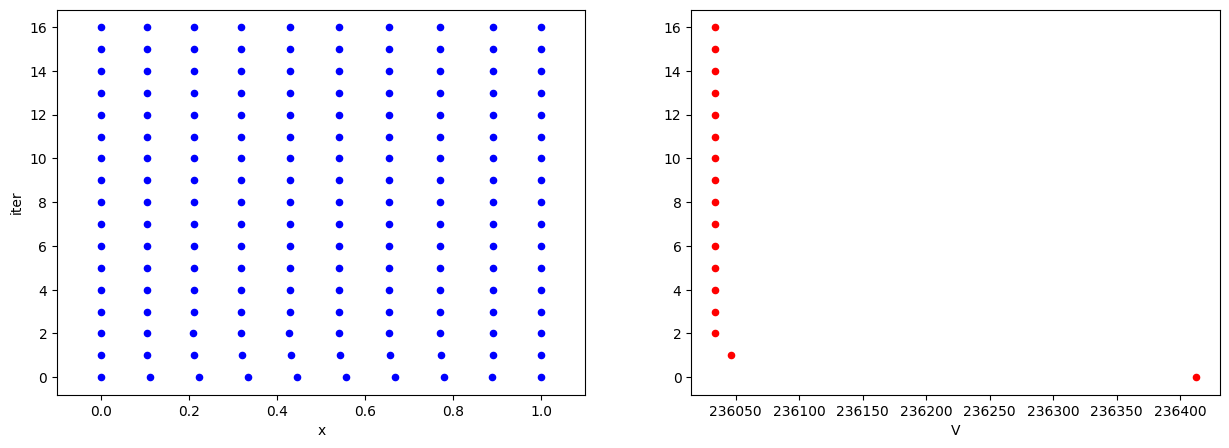

In [ ]:
# Tolerância e número máximo de iterações (Newton)
eps = 1e-8
nitermax = 100

V  = []
x  = []
x0 = # .... completar
x.append(x0)

## início das iterações por Newton
fig    = plt.figure(figsize=(15,5))
gs     = GridSpec(1, 2, figure=fig)
ax1    = fig.add_subplot(gs[0, 0])
ax2    = fig.add_subplot(gs[0, 1])

for it in range(0,nitermax):
  # Calcule aqui o V
  V.append( fV(x[it]) )

  xx     = [0] + x[it] + [L]
  ax1.scatter(xx, np.zeros(len(xx))+it,marker='o',s=20,color="blue")
  ax1.set_xlim([-0.1, L+0.1])
  ax1.set_xlabel('x')
  ax1.set_ylabel('iter')
  ax2.scatter([V[it]], [it],marker='o',s=20,color="red",label="V")
  ax2.set_xlabel('V')

  # Calcule aqui dV
  dV = fdV(x[it])
  normadV = ..... # completar!!
  if normadV < eps:
    break;

  print("V : "+str(V[it])+", norma de dV : "+str(normadV))

  # Calcule aqui d2V
  d2V = fd2V(x[it])

  # Calcule aqui o novo vetor
  # Completar!!!!
  Ud = el_Gaussiana(....,0) # .... completar
  dx = res_triangular_superior(.... , ....) # .... completar

  xnew = .... # completar!!!
  x.append(xnew);
